# Решающие деревья и решающие леса.

# 1. Решающие деревья

Рассмотрим модельную задачу регрессии. Объектами будут являться точки на плоскости (т.е. каждый объект описывается 2 признаками), целевая переменная — расстояние от объекта до точки (0, 0).

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей красивой визуализации

In [2]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

Сгенерируем выборку

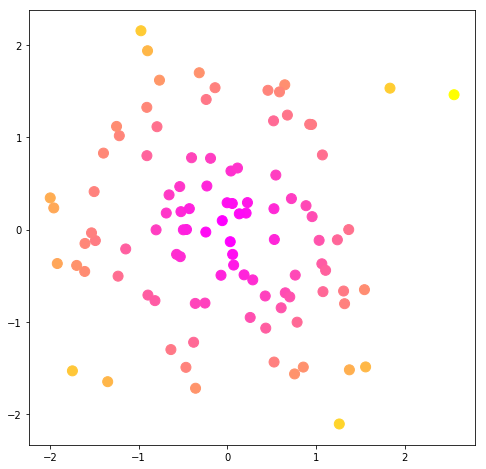

In [12]:
data_x = np.random.normal(size=(100, 2))
data_y = (data_x[:, 0] ** 2 + data_x[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

In [5]:
from sklearn.tree import DecisionTreeRegressor

Обучим дерево на сгенерированных данных и предскажем ответы для каждой точки решетки

[[-3.17588871 -3.10899374]
 [-3.16588871 -3.10899374]
 [-3.15588871 -3.10899374]
 ...
 [ 3.05411129  3.41100626]
 [ 3.06411129  3.41100626]
 [ 3.07411129  3.41100626]]


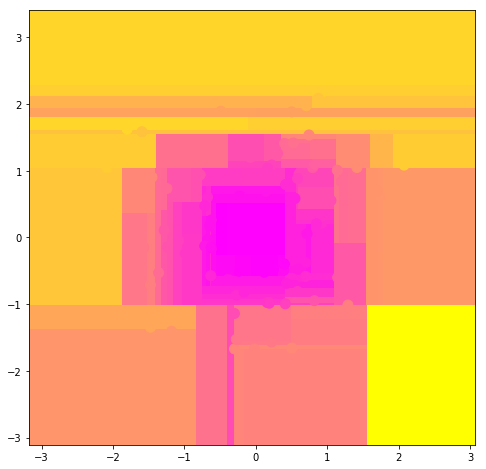

In [6]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x)
print(np.c_[xx.ravel(), yy.ravel()])

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='spring')

# Задание

Сейчас мы сгенерировали 100 точек из нормального распределения и обучили решающее дерево на них. Сгенерируйте 300 точек из нормального распределения, обучите на них дерево и выведите на экран результат (как на картинке выше).

Сгенерированные точки и расстояние до точек сохраните в массивы data_x300, data_y300, для обучения и предсказания используйте эти массивы.

Улучшилось ли предсказание алгоритма на решётке? (т.е. стала ли раскраска всей плоскости более правильной?)

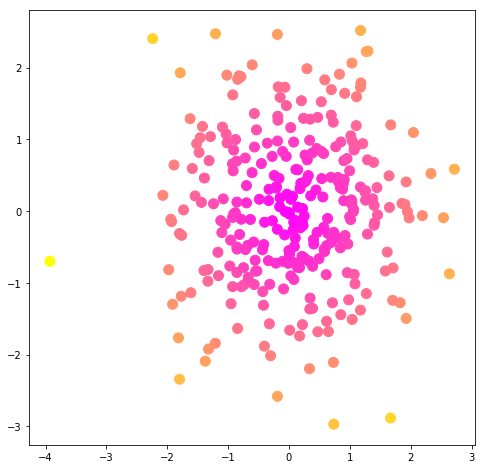

In [13]:
data_x300 = np.random.normal(size=(300, 2))
data_y300 = (data_x300[:, 0] ** 2 + data_x300[:, 1] ** 2) ** 0.5
plt.figure(figsize=(8, 8))
plt.scatter(data_x300[:, 0], data_x300[:, 1], c=data_y300, s=100, cmap='spring')

[[-4.92808434 -3.96911849]
 [-4.91808434 -3.96911849]
 [-4.90808434 -3.96911849]
 ...
 [ 3.69191566  3.51088151]
 [ 3.70191566  3.51088151]
 [ 3.71191566  3.51088151]]


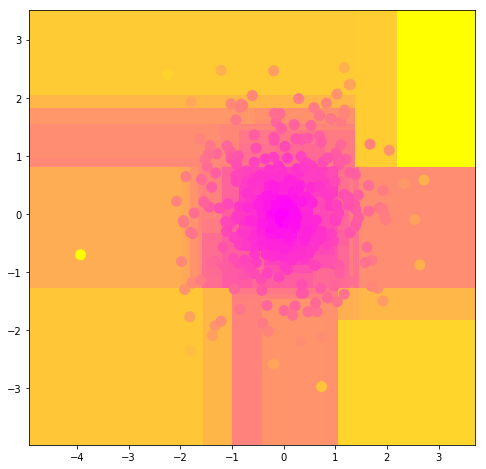

In [14]:
clf = DecisionTreeRegressor()
clf.fit(data_x, data_y)

xx, yy = get_grid(data_x300)
print(np.c_[xx.ravel(), yy.ravel()])

predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, predicted, cmap='spring')
plt.scatter(data_x300[:, 0], data_x300[:, 1], c=data_y300, s=100, cmap='spring')

Вернёмся к исходным данным (100 точек).

Посмотрим как будут выглядеть разделяющая поверхность в зависимости от 
- минимального количества объектов в листе
- максимальной глубины дерева

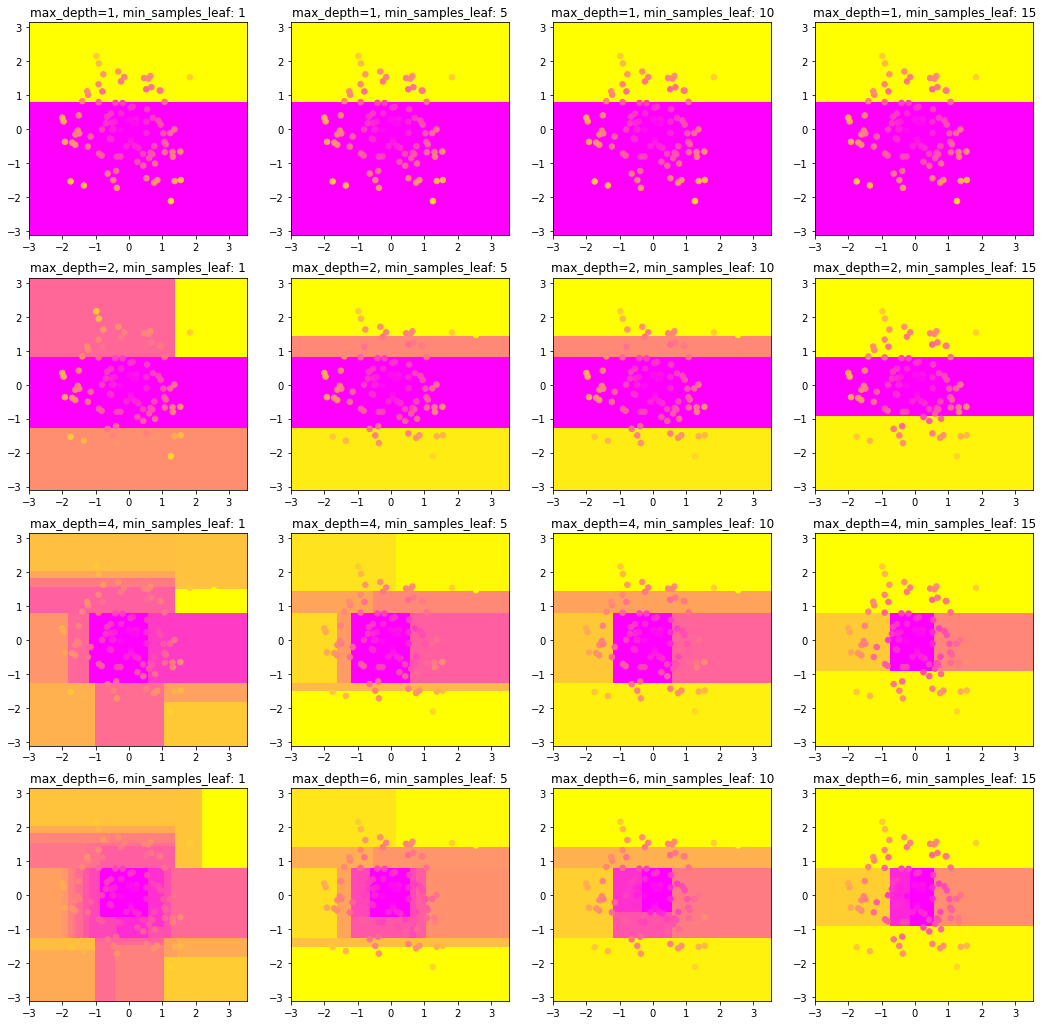

In [15]:
plt.figure(figsize=(18, 18))
for i, max_depth in enumerate([1, 2, 4, 6]):
    for j, min_samples_leaf in enumerate([1, 5, 10, 15]):
        clf = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf.fit(data_x, data_y)
        xx, yy = get_grid(data_x)
        predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        
        plt.subplot2grid((4, 4), (i, j))
        plt.pcolormesh(xx, yy, predicted, cmap='spring')
        plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='spring')
        plt.title('max_depth=' + str(max_depth) + ', min_samples_leaf: ' + str(min_samples_leaf))

- Как влияет увеличение максимальной глубины и/или уменьшение минимального количества объектов выборки в листе на качество на обучающей выборке? на переобучение?

## Неустойчивость решающих деревьев

Решающие деревья — это алгоритмы, неустойчивые к изменениям обучающей выборки, т.е. при малейших её изменениях итоговый классификатор может радикально измениться.
Посмотрим, как будет меняться структура дерева при обучении на разных 90%-х подвыборках.


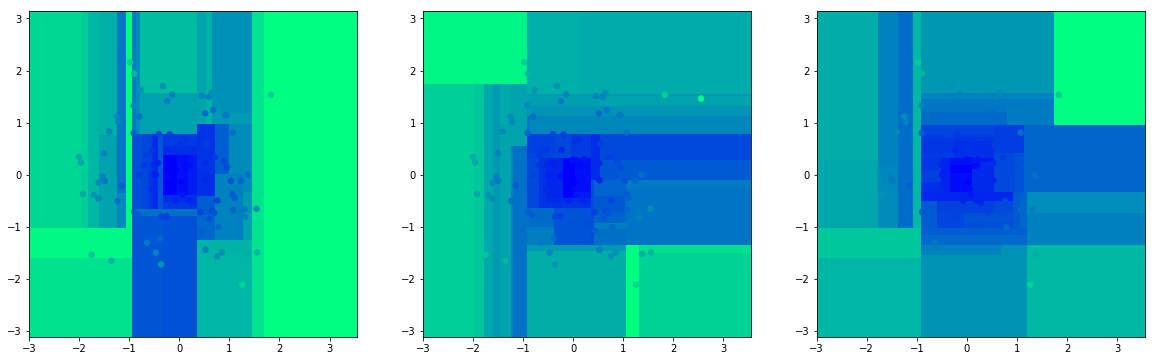

In [16]:
plt.figure(figsize=(20, 6))
for i in range(3):
    clf = DecisionTreeRegressor(random_state=42)

    indices = np.random.randint(data_x.shape[0], size=int(data_x.shape[0] * 0.9))
    clf.fit(data_x[indices], data_y[indices])
    xx, yy = get_grid(data_x)
    predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot2grid((1, 3), (0, i))
    plt.pcolormesh(xx, yy, predicted, cmap='winter')
    plt.scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=30, cmap='winter')

## Подбор параметров

Посмотрим на качество дерева в зависимости от параметров на одном из стандартных наборов данных - Бостонском датасете.

In [17]:
from sklearn.datasets import load_boston

In [18]:
data = load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
X_full = data.data
y_full = data.target

print(X_full[:3])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]


In [20]:
X_full.shape

(506, 13)

In [21]:
y_full[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

- разобъём все данные на train и test
- будем оценивать качество алгоритма по кросс-валидации

In [22]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size=100, 
                                        random_state=241)

In [23]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(X.shape[0], shuffle=True, random_state=241)

In [24]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=241)
print(-cross_val_score(regr, X, y, cv=cv, 
                       scoring='neg_mean_squared_error').mean())

26.10864532019704


In [25]:
regr.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=241, splitter='best')

# Задание

Метрика MSЕ имеет не ограничена сверху. Поэтому для оценки качества алгоритма можно также пользоваться метрикой R2 (коэффициент детерминации), так как он не превышает 1 (и чем ближе к 1, тем лучше).

Выведите на экран значение R2 алгоритма ('r2').

In [38]:
cv = KFold(10, shuffle=True, random_state=241)

In [39]:
print(cross_val_score(regr, X, y, cv=cv, 
                       scoring='r2').mean())

0.5658305741352226


Для сравнения качества модели при различных наборах параметров или для сравнения моделей на одном датасете можно использовать, как и раньше, MSE.

Будем подбирать параметры решающего дерева по сетке с целью увеличить качество алгоритма. Будем подбирать значения max_features и max_depth.

In [40]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [41]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50]},
                  cv=cv,
                  scoring='neg_mean_squared_error')
gs.fit(X, y)

/Users/akhtyamovpavel/Environments/ResearchVenv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=241, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=241,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 20, 50],
                         'max_features': [None, 'log2', 'sqrt']},
             pre_disp

In [42]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

-31.633 (+/-20.511) for {'max_depth': 2, 'max_features': None}
-49.399 (+/-48.129) for {'max_depth': 2, 'max_features': 'log2'}
-49.399 (+/-48.129) for {'max_depth': 2, 'max_features': 'sqrt'}
-22.998 (+/-16.427) for {'max_depth': 4, 'max_features': None}
-55.007 (+/-54.882) for {'max_depth': 4, 'max_features': 'log2'}
-55.007 (+/-54.882) for {'max_depth': 4, 'max_features': 'sqrt'}
-24.723 (+/-17.534) for {'max_depth': 6, 'max_features': None}
-36.241 (+/-26.929) for {'max_depth': 6, 'max_features': 'log2'}
-36.241 (+/-26.929) for {'max_depth': 6, 'max_features': 'sqrt'}
-24.965 (+/-19.341) for {'max_depth': 8, 'max_features': None}
-38.491 (+/-38.110) for {'max_depth': 8, 'max_features': 'log2'}
-38.491 (+/-38.110) for {'max_depth': 8, 'max_features': 'sqrt'}
-27.713 (+/-17.853) for {'max_depth': 10, 'max_features': None}
-34.473 (+/-41.271) for {'max_depth': 10, 'max_features': 'log2'}
-34.473 (+/-41.271) for {'max_depth': 10, 'max_features': 'sqrt'}
-30.071 (+/-26.444) for {'max_de

# Задание

Теперь попробуем одновременно подбирать значения max_features, max_depth и min_samples_leaf. Ищите min_samples_leaf в диапазоне range(1,20).

In [44]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeRegressor(random_state=241),
                  param_grid={'max_features': [None, 'log2', 'sqrt'], 
                              'max_depth': [2, 4, 6, 8, 10, 20, 50],
                              'min_samples_leaf': range(1, 20)
                             },
                  cv=cv,
                  scoring='neg_mean_squared_error')
gs.fit(X, y)

/Users/akhtyamovpavel/Environments/ResearchVenv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=241, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=241,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 20, 50],
                         'max_features': [None, 'log2', 'sqrt'],
                      

In [45]:
gs.best_score_

-19.131728868559247

Как в данной задаче зависит качество алгоритма от количества параметров, которые мы оптимизируем?

# Решающие деревья для классификации

Сгенерируем данные. Два класса будут сгенерированы из двух нормальных распределений с разными средними.

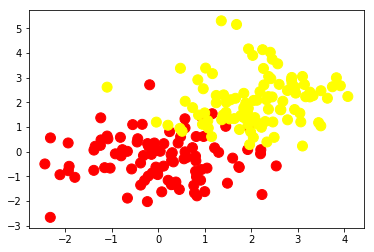

In [46]:
n = 100
a = np.random.normal(loc=0, size=(n, 2))
b = np.random.normal(loc=2, size=(n, 2))

data_x = np.vstack([a, b])
data_y = np.hstack([np.zeros(n), np.ones(n)])

scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=100, cmap='autumn')

Попробуем разделить эти два класса, обучив решающее дерево. Визуализируем полученную границу разделения класссов.

(-3.4301814821268297, 5.069818517872989)

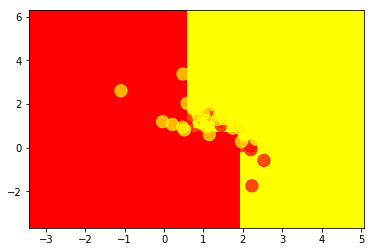

In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=7)
clf.fit(data_x, data_y)
xx, yy = get_grid(data_x)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
pcolormesh(xx, yy, predicted, cmap='autumn')
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=150, cmap='autumn', alpha=0.7)
ylim([yy.min(),yy.max()])
xlim([xx.min(),xx.max()])

# Задание
По аналогии с GridSearchCV для DecisionTreeRegressor используйте GridSearchCV для DecisionTreeClassifier, чтобы посмотреть, как различные параметры влияют на качество классификации.

возьмите cv=5 (число фолдов), параметры 'min_samples_leaf': [1, 3, 7, 20], 'max_depth': [2, 3, 5, 10]

In [ ]:
#Your code here

In [ ]:
print(gs.best_params_)

In [ ]:
clf = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20)
clf.fit(data_x, data_y)
xx, yy = get_grid(data_x)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
pcolormesh(xx, yy, predicted, cmap='autumn')
scatter(data_x[:, 0], data_x[:, 1], c=data_y, s=150, cmap='autumn', alpha=0.7)
ylim([yy.min(),yy.max()])
xlim([xx.min(),xx.max()])

## 2. Решающий лес

Посмотрим, какое качество можно получить при использовании решающего леса. Будем делать предсказания на Boston dataset.

In [48]:
regr = DecisionTreeRegressor()
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

21.725116463414636


In [49]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=10)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

12.386159689024389


In [50]:
regr = RandomForestRegressor(n_estimators=100)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

11.543702873719514


In [51]:
regr = RandomForestRegressor(n_estimators=300, n_jobs=-1)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

11.36043926432927


In [52]:
regr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

11.332729064209762


In [53]:
regr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
print(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())

11.406253936218318


# Задание
Постройте график качества классификации на кросс-валидации в зависимости от числа деревьев.

На каждой итерации цикла обучайте регрессор командой `regr = ...` и добавляйте в список `scores` число `cross_val_score`:
`scores.append(cross_val_score(...))`

100%|██████████| 6/6 [00:12<00:00,  2.33s/it]


([<matplotlib.axis.XTick at 0x12870c588>,
 <a list of 6 Text xticklabel objects>)

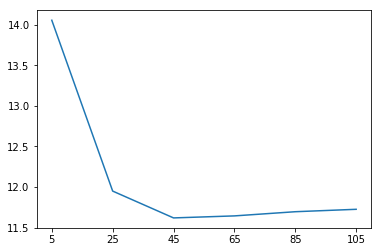

In [54]:
from tqdm import tqdm

N_TREES = np.arange(5,120,20)
scores = []

for current_tree_num in tqdm(N_TREES):
    #Your code here
    regr = RandomForestRegressor(n_estimators=current_tree_num, n_jobs=-1)
    scores.append(-cross_val_score(regr, X, y, cv=cv,
                       scoring='neg_mean_squared_error').mean())
    
plot(scores)
xticks(arange(len(N_TREES)), N_TREES)

# Задание
Поработайте с датасетом wine_data (в каждой строке этого датасета содержится информация о бутылках вина одного из трёх видов: в первой колонке - вид вина (1, 2 или 3), в колонках 1-13 - свойства вина). 

1) Посчитайте качество DecisionTreeClassifier и RandomForestClassifier на кросс-валидации.

2*) Попробуйте уменьшить число признаков с помощью какого-либо метода отбора признаков (http://scikit-learn.org/stable/modules/feature_selection.html ). Добейтесь увеличения качества RandomForestClassifier на кросс-валидации.

Подсказка. Посмотрите, какой параметр отвечает за то, что столбец не является важным. При помощи этого параметра можно оценить, какие признаки не являются важными для модели.

In [55]:
data = pd.read_csv('wine_data.csv', header=None)
print(data.shape)
data.head()

(178, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [56]:
y = data[0].as_matrix()
X = data.drop(0, axis=1).as_matrix()
print(X.shape, y.shape)

(178, 13) (178,)


/Users/akhtyamovpavel/Environments/ResearchVenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/akhtyamovpavel/Environments/ResearchVenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [57]:
# Solution
cv = KFold(n_splits=10, shuffle=True, random_state=241)

In [60]:
# Solution
from sklearn.metrics import SCORERS
print(list(SCORERS.keys()))

['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted']


In [76]:
# Solution
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


def validate_classification(classifier, X, y):
    return cross_val_score(classifier, X=X, y=y, cv=cv, scoring='accuracy').mean()

In [66]:
# Solution
one_tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=10)


In [77]:
# Solution
print('One tree: {}'.format(validate_classification(one_tree, X, y)))
print('Multiple trees: {}'.format(validate_classification(forest, X, y)))

One tree: 0.9094771241830066
Multiple trees: 0.9722222222222221


In [68]:
validate_classification(forest)

0.9718954248366014

In [78]:
columns = [0, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12]

In [79]:
X_cleared = X[:, columns]

In [80]:
print('One tree: {}'.format(validate_classification(one_tree, X_cleared, y)))
print('Multiple trees: {}'.format(validate_classification(forest, X_cleared, y)))

One tree: 0.8928104575163399
Multiple trees: 0.9830065359477125


# Задание
Примените к BostonDataset линейную регрессию. Сравните ее качество на кросс-валидации с качеством DecisionTreeRegressor и RandomForestRegressor.
Какой алгоритм работает лучше?

In [81]:
boston_data = load_boston()

In [83]:
data_x = boston_data.data
data_y = boston_data.target

In [ ]:
regressor = #your algorithm here
cv = KFold(10, shuffle=True, random_state=241)

print(-cross_val_score(regressor, data_x, data_y, cv=cv, scoring='neg_mean_squared_error').mean())

# Try other algorithms

In [87]:
# Solution
regressor = RandomForestRegressor(n_estimators=5)
cv = KFold(10, shuffle=True, random_state=241)

print(-cross_val_score(regressor, data_x, data_y, cv=cv, scoring='neg_mean_squared_error').mean())

11.827806149019608
